<a href="https://colab.research.google.com/github/Lorddickenstein/FSLRwithNLP/blob/main/Tutorials/CNN_TRY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os  # iterate through the directories
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow

Importing the datasets from google drive

In [ ]:
def import_data():
    """@doc Get the train datasets"""
    df_train = pd.read_csv(
        '/content/drive/MyDrive/Colab Notebooks/Datasets/Fingerspelling/sign_mnist_train/sign_mnist_train.csv')
    # print(df_train.head())

    x_sets = df_train.drop(columns=['label'])
    y_sets = df_train[['label']]

    x_train = x_sets[:22000]
    y_train = y_sets[:22000]
    # print(x_train.head())
    # print(y_train.head())

    x_valid = x_sets[22001:]
    y_valid = y_sets[22001:]

    """@doc Get the test datasets"""
    df_test = pd.read_csv(
        '/content/drive/MyDrive/Colab Notebooks/Datasets/Fingerspelling/sign_mnist_test/sign_mnist_test.csv')
    # print(df_test.head())

    x_test = df_test.drop(columns=['label'])
    y_test = df_test[['label']]
    # print(x_test.head())
    # print(y_test.head())

    """Convert to np array"""
    x_train = x_train.to_numpy()
    y_train = y_train.to_numpy()
    x_test = x_test.to_numpy()
    y_test = y_test.to_numpy()

    """Reshape to 28x28"""
    num_rows_train, _ = x_train.shape
    num_rows_test, _ = x_test.shape
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    # print(x_train.shape)

    """Normalize data"""
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')

    x_train /= 255
    x_test /= 255

    """Convert to categorical variables"""
    y_train = keras.utils.to_categorical(y_train, 26)
    y_test = keras.utils.to_categorical(y_test, 26)
    return x_train, y_train, x_test, y_test

Test the model from a given dataset image

In [ ]:
def test_model_from_dataset(x_train, y_train, x_test, y_test, model_name):
    model = keras.models.load_model(model_name)
    print(y_train[10170])
    # plt.imshow(x_train[10170], cmap='gray')
    # plt.show()
    x_train = x_train[10170].reshape(-1, 28, 28, 1)
    print(x_train)
    print(x_train.shape)
    print(x_train.ndim)
    prediction = model.predict(x_train)
    print(prediction)
    class_x = np.argmax(prediction, axis=1)
    print(find_match(class_x[0]))

Test model from an external image

In [ ]:
def test_model(img):
    model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/CNN Models/FingerSpelling(32, 64, 128)_(0.4652-0.9072).h5')
    prediction = model.predict(img)
    print(prediction)
    class_x = np.argmax(prediction, axis=1)
    print(find_match(class_x[0]))

Find a match from the categories

In [ ]:
def find_match(x):
    spell = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E',
             5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: ' ',
             10: 'K', 11: 'L',12: 'M', 13: 'N', 14: 'O',
             15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
             20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y',
             25: ' ', }
    return spell[x]

Show the current image

In [ ]:
def show_image(name, img):
    # plt.imshow(img, cmap='gray')
    # plt.show()
    cv2_imshow(img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

Image Processing

In [ ]:
def preprocess_image(img):
    """Smoothen img using Gausian blur"""
    blur_img = cv2.GaussianBlur(img, (5, 5), 0)
    # blur_img = cv2.blur(img, (5, 5), 0)
    # blur_img = cv2.medianBlur(img, 5)
    # show_image('blur', blur_img)

    """Threshold Image using Otsu's Binarization"""
    _, th = cv2.threshold(blur_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # show_image('threshold', th)

    """Normalize img"""
    norm_img = mask.astype('float32')
    norm_img /= 255
    # show_image('normalized', norm_img)

    # canny edge

    """Apply morphological transformation"""
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
    morph = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)
    show_image('morph', morph)

    """Apply mask to extract object"""
    mask = cv2.bitwise_and(img, img, mask=morph)
    show_image('mask', mask)

    """Reshape img to 28x28"""
    img_size = 28
    resize_img = cv2.resize(norm_img, (img_size, img_size), interpolation=cv2.INTER_CUBIC)
    # plt.imshow(resize_img, cmap='gray')
    # plt.show()

    """Expand img into 4d"""
    resize_img = np.expand_dims(resize_img, axis=(0, -1))
    # print(img)
    print("Shape", resize_img.shape)
    print(resize_img.ndim)
    return resize_img

Create the model

In [ ]:
def create_model(x_train, y_train, x_test, y_test):
    """Create the model"""
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.50))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.70))
    model.add(keras.layers.Dense(26, activation='softmax'))

    model.summary()
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
    model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=30)
    print(model.evaluate(x_test, y_test))
    return model

Save the model

In [ ]:
def save_model(model, name):
    model.save(name)

Main Configuration Area #1

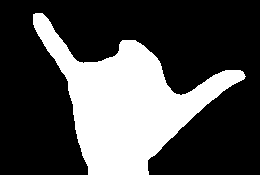

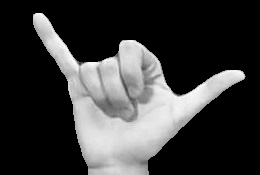

Shape (1, 28, 28, 1)
4
[[8.1856476e-29 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.5201311e-34
  6.5799388e-10 0.0000000e+00 2.9670895e-36 9.9999917e-01 0.0000000e+00
  0.0000000e+00 0.0000000e+00 8.5388151e-37 4.4578540e-35 1.0332715e-21
  7.1028357e-30 0.0000000e+00 0.0000000e+00 4.4711232e-34 7.3751440e-21
  0.0000000e+00 0.0000000e+00 5.3041818e-35 3.0843131e-18 8.7761725e-07
  0.0000000e+00]]
I


In [ ]:
# path = "D:\Documents\Thesis\FSLRwithNLP\Datasets\Test_Images"
file_name = 'Y2.jpg'
path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Test_Images/' + file_name
img = cv2.imread(path, 0)
img = preprocess_image(img)
test_model(img)

Main Configuration Area #2

In [ ]:
# model_name = 'Fingerspelling(16, 32, 64)_(0.5030-0.9015).h5'
model_name = 'test1.h5'
# model_name = 'test_(0.5979_0.9139).h5'
path = '/content/drive/MyDrive/Colab Notebooks/CNN Models/' + model_name
x_train, y_train, x_test, y_test = import_data()
model = create_model(x_train, y_train, x_test, y_test)
save_model(model, path)
test_model_from_dataset(x_train, y_train, x_test, y_test, model_name)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

KeyboardInterrupt: ignored